<a href="https://colab.research.google.com/github/praveen310194/DL/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np
import pandas as pd

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


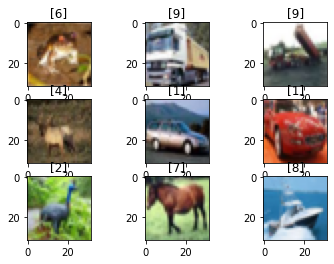

In [ ]:
#Display traing data with expected outcome
for i in range(9):
    plt.subplot(330+1+i)
    plt.title(y_train[i])    
    plt.imshow(x_train[i],cmap='Greys')

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
mean=np.mean(x_train,axis=(0,1,2,3))
std=np.std(x_train,axis=(0,1,2,3))

In [ ]:
x_train=(x_train-mean)/(std+1e-7)
x_test=(x_test-mean)/(std+1e-7)

In [ ]:
# np_utils.to_categorical is used to convert vector to binary matrix with 10 dimensions
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
for i in range(0,9):
  print(y_train[i])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
#input_shape(32)-kernel_size(3)+input_channel(3)=32
#[kernel_size(5)*kernel_size(5)*input_channel(3)+bias(1)]*filter(32)=param(896)
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
#input_shape(32)-kernel_size(3)+3)=32
#[kernel_size(5)*kernel_size(5)*input_channel(previous_filter)(32)+bias(1)]*filter(32)=param(9248)---pf
model.add(MaxPooling2D(pool_size=(2,2)))
#input_shape(32)/pool_size(2)=16
model.add(Dropout(0.2)) #dropout used to avoid overfitting
#input_shape=(16, 16, 32) 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
#input_shape(16)-kernel_size(3)+input_channel(3))=16
#[kernel_size(5)*kernel_size(5)*input_channel(previous_filter)(32)+bias(1)]*filter(64)=param(18496)---pf
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
#input_shape(16)-kernel_size(3)+input_channel(3))=16
#[kernel_size(5)*kernel_size(5)*input_channel(previous_filter)(64)+bias(1)]*filter(64)=param(18496)---pf
model.add(MaxPooling2D(pool_size=(2,2)))
#input_shape(16)/pool_size(2)=8
#filter=64
model.add(Dropout(0.3))
#(8, 8, 64)
model.add(Flatten())
#8*8*64=4096
model.add(Dense(10,activation='softmax'))
#4096*10+10

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
#data augmentation
datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 256s 652ms/step - loss: 1.7949 - accuracy: 0.3542 - val_loss: 1.2566 - val_accuracy: 0.5530
Epoch 2/10
391/391 [==============================] - 253s 646ms/step - loss: 1.2152 - accuracy: 0.5714 - val_loss: 0.9835 - val_accuracy: 0.6524
Epoch 3/10
391/391 [==============================] - 253s 648ms/step - loss: 0.9811 - accuracy: 0.6570 - val_loss: 0.8724 - val_accuracy: 0.6971
Epoch 4/10
391/391 [==============================] - 253s 647ms/step - loss: 0.8486 - accuracy: 0.7020 - val_loss: 0.8000 - val_accuracy: 0.7250
Epoch 5/10
391/391 [==============================] - 254s 651ms/step - loss: 0.7794 - accuracy: 0.7295 - val_loss: 0.7425 - val_accuracy: 0.7422
Epoch 6/10
391/391 [==============================] - 252s 645ms/step - loss: 0.7131 - accuracy: 0.7535 - val_loss: 0.7244 - val_accuracy: 0.7517
Epoch 7/10
391/391 [==============================] - 253s 647ms/step - loss: 0.6611 - accuracy: 0.7732 - val_loss: 0.7501 -

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print('loss : %.2f, acc: %.2f' % ((loss*100),(accuracy*100)))

313/313 [==============================] - 12s 40ms/step - loss: 0.6887 - accuracy: 0.7628
loss : 68.87, acc: 76.28


In [ ]:
pred=model.predict(x_test)
pred1=np.argmax(pred, axis=1)[:]
label=np.argmax(y_test, axis=1)[:]

for i in range(20):
    print('predicted %d--Expected %d' % (pred1[i], label[i]))

predicted 3--Expected 3
predicted 8--Expected 8
predicted 1--Expected 8
predicted 0--Expected 0
predicted 6--Expected 6
predicted 6--Expected 6
predicted 9--Expected 1
predicted 2--Expected 6
predicted 3--Expected 3
predicted 1--Expected 1
predicted 0--Expected 0
predicted 9--Expected 9
predicted 5--Expected 5
predicted 7--Expected 7
predicted 9--Expected 9
predicted 8--Expected 8
predicted 5--Expected 5
predicted 7--Expected 7
predicted 8--Expected 8
predicted 6--Expected 6
